In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
# get UTKFace.zip  
import os

if os.path.exists("/content/drive/MyDrive/Colab Notebooks/"):
    COLAB_PATH = "/content/drive/MyDrive/Colab Notebooks/大伯 - ML_Code"
else:
    COLAB_PATH = "/content/drive/MyDrive/UTKFace-Code/"
os.chdir(COLAB_PATH)

!pwd
!ls -l

/content/drive/MyDrive/Colab Notebooks/大伯 - ML_Code
total 4521411
-rw------- 1 root root    8191848 Jul  4  2021 best_cifar10_weights.h5
-rw------- 1 root root   90251248 Aug 15 16:49 best_fmnist_weights.h5
-rw------- 1 root root   12866776 Nov  2 17:03 best_race_weights.h5
-r-------- 1 root root 4405025375 Jul 25  2018 CASIA-WebFace.zip
drwx------ 2 root root       4096 Aug 15 11:16 cifar-10-batches-py
-rw------- 1 root root    1104376 Oct  6 23:41 cifar10_classifier.ipynb
-rw------- 1 root root       3091 Jun 30  2021 cifar10_cnn_orig.py
-rw------- 1 root root      14757 Aug  6 22:33 cifar10_convert_img.ipynb
-rw------- 1 root root     179617 Oct  6 23:41 fMnist_classifier.ipynb
drwx------ 2 root root       4096 Aug 15 11:16 hyper_dir
drwx------ 2 root root       4096 Aug 15 11:16 model_weights
-rw------- 1 root root     222380 Jul  4  2021 ResNet9_128_batch_acc_0.9332_fig.png
-rw------- 1 root root     220955 Jul  2  2021 ResNet9_128_batch_acc_0.9392_fig.png
-rw------- 1 root root  

In [ ]:
import tarfile

if os.path.exists("UTKFace"):
    print("UTKFace folder already exists.")
else:
    tar = tarfile.open("UTKFace.tar.gz")
    tar.extractall()
    tar.close()
    
    print("UTKFace.tar.gz has been unzipped.")

UTKFace folder already exists.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# class UTKFaceIter:
#     def __init__(self, data_path):
#         self.path = data_path

#     def __iter__(self):
#         for i in os.scandir(self.path):
#             yield i.name

# data cleaning
utk_clean = True

if utk_clean:
    no_human_faces_mtcnn = os.listdir("UTKFace-data-cleaning/no-human-faces-mtcnn")
    %time utk_face = pd.Series(np.setdiff1d(os.listdir("UTKFace"), no_human_faces_mtcnn))
else:
    # %time utk_face = pd.Series(list(UTKFaceIter("UTKFace")))
    %time utk_face = pd.Series(os.listdir("UTKFace"))


img = plt.imread(os.getcwd()+"/UTKFace/"+utk_face[0], "jpg")
print(f"\nUTKFace Total Imgs: {utk_face.count()}, Shape: {img.shape}")
print(f"UTKFace have: {utk_face.isnull().sum()} NaN values.\n")


# Other: (missing race)
other = utk_face[utk_face.str.match(r"^[0-1]?\d?\d+_[0-1]_[0-4]+_") == False]
print(f"Other img(missing race): {other.count()}\n\n{other}\n")
print("----------------------------------------------")


# UTKFace total data exclude Other(missing race) 
utkface_drop_other = np.setdiff1d(utk_face, other)
print(f"new_utkface length: {len(utkface_drop_other)}\n")
print(utkface_drop_other)
print("\n----------------------------------------------")


# Parse race and build labels
race = {0: "white", 1: "black", 2: "asian", 3: "indian", 4: "others"}
gender = {0: "male", 1: "female"}

utkface_dict = {}
utkface_dict["race"] = race
utkface_dict["gender"] = gender
print(f"utkface_dict: {utkface_dict}")
print("\n----------------------------------------------")


def parse_race(file):
    age, gender, race, _ = str(file).split("_")
    
    return age, utkface_dict["gender"][int(gender)], utkface_dict["race"][int(race)], race


def build_df_and_labels(dataset):
    key = ["age", "gender", "race", "race_labels"]
    empty_4_list = [list()*i for i in range(5)]
    utk_info = {k: v for k, v in zip(key, empty_4_list)}

    for file in dataset:
        a, g, r, r_l = parse_race(file)

        utk_info["race_labels"].append(r_l)
        utk_info["age"].append(a)
        utk_info["gender"].append(g)
        utk_info["race"].append(r)
    
    df = pd.DataFrame(utk_info, columns = key)
    df["file"] = dataset   

    return df, utk_info


df, utk_info = build_df_and_labels(utkface_drop_other)

print(f"race_labels length: {len(np.array(utk_info['race_labels']))}\nrace_labels top 10: {utk_info['race_labels'][:10]}\n\n")
print("UTKFace info DataFrame:")
df.head()

CPU times: user 366 ms, sys: 90.8 ms, total: 457 ms
Wall time: 1min 17s

UTKFace Total Imgs: 19065, Shape: (200, 200, 3)
UTKFace have: 0 NaN values.

Other img(missing race): 3

12387    39_1_20170116174525125.jpg.chip.jpg
16952    61_1_20170109142408075.jpg.chip.jpg
16953    61_1_20170109150557335.jpg.chip.jpg
dtype: object

----------------------------------------------
new_utkface length: 19062

['100_0_0_20170112215240346.jpg.chip.jpg'
 '100_1_0_20170112213303693.jpg.chip.jpg'
 '100_1_0_20170119212053665.jpg.chip.jpg' ...
 '9_1_4_20170103200637399.jpg.chip.jpg'
 '9_1_4_20170103200814791.jpg.chip.jpg'
 '9_1_4_20170103213057382.jpg.chip.jpg']

----------------------------------------------
utkface_dict: {'race': {0: 'white', 1: 'black', 2: 'asian', 3: 'indian', 4: 'others'}, 'gender': {0: 'male', 1: 'female'}}

----------------------------------------------
race_labels length: 19062
race_labels top 10: ['0', '0', '0', '2', '2', '2', '0', '0', '0', '0']


UTKFace info DataFrame:


,age,gender,race,race_labels,file
0,100,male,white,0,100_0_0_20170112215240346.jpg.chip.jpg
1,100,female,white,0,100_1_0_20170112213303693.jpg.chip.jpg
2,100,female,white,0,100_1_0_20170119212053665.jpg.chip.jpg
3,100,female,asian,2,100_1_2_20170105174847679.jpg.chip.jpg
4,100,female,asian,2,100_1_2_20170112222336458.jpg.chip.jpg


In [ ]:
# Create a train and test dataset
import tensorflow as tf
from sklearn.model_selection import train_test_split

utk_dict = {"images": utkface_drop_other, "labels": utk_info['race_labels']}
print(utk_dict)


def dataset_split(data, test_split = 0.2, seed = 42):
    imgs, labels = data["images"], data["labels"]

    # default: split train and test to 80% and 20%
    train_imgs, test_imgs = train_test_split(imgs, test_size = test_split, random_state = seed)
    train_labels, test_labels = train_test_split(labels, test_size = test_split, random_state = seed)

    # split half of test into valid (1:1) --> (10%:10%)
    test_imgs_split, test_labels_split = test_imgs[: len(test_imgs)//2], test_labels[: len(test_labels)//2]
    valid_imgs_split, valid_labels_split = test_imgs[len(test_imgs)//2: ], test_labels[len(test_labels)//2: ]

    return (train_imgs, train_labels), (test_imgs_split, test_labels_split), (valid_imgs_split, valid_labels_split)


train_set, test_set, valid_set = dataset_split(utk_dict)

print(f"\ntrain_imgs length: {len(train_set[0])}")
print(f"\ntest_imgs length: {len(test_set[0])}\nvalid_imgs length: {len(valid_set[0])}")


import multiprocessing as mp

# os.cpu_count()
cpu_count = len(os.sched_getaffinity(0))
print(f"cpu available: {cpu_count}")


def labels_str_to_int(data_labels):
    data_labels_int = [int(i) for i in data_labels]

    return np.asarray(data_labels_int)


# read img container
class ImgIter:
    def __init__(self, dataset):
        self.dataset = dataset
    
    def __iter__(self):
        for i in self.dataset:
            yield "./UTKFace/"+i


class ConvertIter:
    def __init__(self, map_data):
        self.map_data = map_data
    
    def __iter__(self):
        for i in self.map_data:
            yield tf.image.decode_image(i)


def multi_process(data, cpu_available = cpu_count):
    with mp.Pool(processes = cpu_available) as pool:
        res_numpy = list(ConvertIter(pool.map(tf.io.read_file, ImgIter(data))))

        return res_numpy


utkface_to_numpy = {"images": (multi_process(train_set[0]), multi_process(valid_set[0]),
                               multi_process(test_set[0])), 
                    "labels": (labels_str_to_int(train_set[1]), labels_str_to_int(valid_set[1]), 
                               labels_str_to_int(test_set[1]))}      

utkface_to_numpy

In [ ]:
# Build Example
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example

np.random.seed(42)

X_train, y_train = utkface_to_numpy["images"][0], utkface_to_numpy["labels"][0]
print(len(X_train), len(y_train))

X_valid, y_valid = utkface_to_numpy["images"][1], utkface_to_numpy["labels"][1]
print(len(X_valid), len(y_valid))

X_test, y_test = utkface_to_numpy["images"][2], utkface_to_numpy["labels"][2]
print(len(X_test), len(y_test))

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train))
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))


def example_protobuf(img, label):
    image = tf.io.serialize_tensor(img)
    # image_shape = img.numpy().shape
    
    feature = {
        # "shape": Feature(int64_list = Int64List(value = [image_shape[0], image_shape[1], image_shape[2]])),
        "image": Feature(bytes_list = BytesList(value = [image.numpy()])),
        "label": Feature(int64_list = Int64List(value = [label]))
    }
    
    return Example(features = Features(feature = feature))


for image, label in train_dataset.take(1):
    print(example_protobuf(image, label))

15249 15249
1907 1907
1906 1906
features {
  feature {
    key: "image"
    value {
      bytes_list {
        value: "\010\004\022\016\022\003\010\310\001\022\003\010\310\001\022\002\010\003\"\300\251\007\265Ic\265Ic\266Hc\267Id\271Hd\272Ie\273Ic\274Jd\273Kc\273Kc\271Lc\267Kb\266K_\264J^\260I\\\256I[\260Ma\257Na\256M`\255L_\255L_\254K^\253J[\253J[\254K\\\254K\\\253KY\253KY\253IX\252HW\251GT\250HV\253J]\251J^\250J\\\250J\\\247I[\247I[\245IX\245IX\245IX\245IX\245IV\244HU\242HT\241GS\241GQ\240FP\236FT\235ES\235ES\233CQ\231CP\226BO\225AN\223CN\221AL\217BL\215AK\215AK\213BK\212AJ\211BJ\210BL\205AN\204BP\205CQ\205CQ\207CR\210DS\213DT\213DT\215CT\214BS\216AS\216AS\217BT\220CU\222CV\222EW\216CW\214CV\212CU\211BT\210AS\206?Q\203>P\203>P\203@Q\202?P\200@P\177?O}?N|>M|>Mx>Lt@Mp@Lo?Km=Il<Jj:Hi9Ih8Hg8Jf7Ie6Jc4H`3H`3H`3H`3Gd3Fd4Dd4Dc3Ca2Da2D^1E^1EY.BW,@U+AS)?O\'?N&>M%=M%=K$?K$?H$@G#?E\"@C\"?C\"A@!@= ?; ?:\037@8\037?6\036@5\035?2\034@1\034=9!C8 @6!@5 ?3 >0 =0\037?/ ?+\036<)\036<)\036>(\037>&\037>%\0

In [ ]:
# Build TFRecord
from contextlib import ExitStack

data_clean = True
if data_clean:
    tfrecords_path = "./UTKFace_data_cleaning_TFRecords/"
else:
    tfrecords_path = "./UTKFace_not_split_TFRecords/"


def build_dir(path):
    if os.path.exists(path):
        print(path[2:-1]+" dir is exist !")
    else:
        for i in ["train", "valid", "test"]:
            os.makedirs(path+i)
    

def build_tfrecord(name, dataset, n_split = None, compress_attr = "GZIP"):
    options = tf.io.TFRecordOptions(compression_type = compress_attr)
    paths = [data_cleaning_path + f"{name}/UTKFace_{name}_set-{n}-{n_split}.tfrecords" for n in range(n_split)]
    with ExitStack() as stack:
        writer = [stack.enter_context(tf.io.TFRecordWriter(path, options)) for path in paths]
        for i, (image, label) in dataset.enumerate():
            index = i % n_split
            example = example_protobuf(image, label)
            writer[index].write(example.SerializeToString())

In [ ]:
build_dir(tfrecords_path)  # no_data_cleaning_path
build_tfrecord("train", train_dataset, n_split = 10)
build_tfrecord("valid", valid_dataset, n_split = 1)
build_tfrecord("test", test_dataset, n_split = 1)

UTKFace_data_cleaning_TFRecords dir is exist !


In [8]:
# [train, valid, test] partial tfrecords dataset size

for i, j in zip(["train", "valid", "test"], [10, 1, 1]):
    !du -sh ./UTKFace_data_cleaning_TFRecords/{i}/UTKFace_{i}_set-0-{j}.tfrecords.gz

122M	./UTKFace_data_cleaning_TFRecords/train/UTKFace_train_set-0-10.tfrecords.gz
152M	./UTKFace_data_cleaning_TFRecords/valid/UTKFace_valid_set-0-1.tfrecords.gz
152M	./UTKFace_data_cleaning_TFRecords/test/UTKFace_test_set-0-1.tfrecords.gz


In [ ]:
# build tarfile to compress tfrecords
train_path = f"{tfrecords_path}train/"
valid_path = f"{tfrecords_path}valid/"
test_path = f"{tfrecords_path}test/"


# def build_tarfile_to_compress_tfrecords(name, paths):
#     with tarfile.open(f"{tfrecords_path}{name}/UTKFace_{name}_dataset.tfrecords.tar", "w") as tar:
#         for i in os.listdir(paths):
#             tar.add(paths+i)

# build_tarfile_to_compress_tfrecords("train", train_path)

In [ ]:
# Parse(Preprocess) TFRecord 
AUTOTUNE = tf.data.experimental.AUTOTUNE

def parse_tfrecord(tfrecord):
    feature = {
        # "shape": tf.io.FixedLenFeature([3], tf.int64),
        "image": tf.io.FixedLenFeature([], tf.string),
        "label": tf.io.FixedLenFeature([], tf.int64)
    }
    parse_example = tf.io.parse_single_example(tfrecord, feature)
    image = tf.io.parse_tensor(parse_example["image"], out_type=tf.uint8)
    image = tf.reshape(image, shape=[200, 200, 3])

    return image, parse_example["label"]

def preprocess_dataset(paths, n_threads = AUTOTUNE, buf_size = None, batch_size = 32, compress_attr = "GZIP"):
    path_list = tf.data.Dataset.list_files(paths, seed = 42)

    # decompress tfrecords
    dataset = tf.data.TFRecordDataset(path_list, compression_type = compress_attr, num_parallel_reads = n_threads)
    if buf_size:
        dataset = dataset.shuffle(buf_size)
    dataset = dataset.cache()
    dataset = dataset.map(parse_tfrecord, num_parallel_calls = n_threads)

    return dataset.batch(batch_size).prefetch(1)

In [ ]:
# decompress tarfile to tfrecords.gz

# def decompress_tarfile_to_retrieve_tfrecords_gz(name, paths):
#     with tarfile.open(paths+f"/UTKFace_{name}_dataset.tfrecords.tar") as tar:
#         tar.extractall()

# decompress_tarfile_to_retrieve_tfrecords_gz("train", train_path)

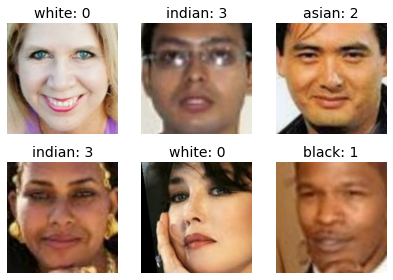

In [ ]:
# Plot train_set

train_set = preprocess_dataset(os.path.join(train_path, "UTKFace_train_*.tfrecords"), buf_size = 20000)
valid_set = preprocess_dataset(os.path.join(valid_path, "UTKFace_valid_*.tfrecords"))
test_set = preprocess_dataset(os.path.join(test_path, "UTKFace_test_*.tfrecords"))


plt.figure(tight_layout = True)
for X, Y in train_set.take(1):
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.axis("off")
        plt.imshow(X[i].numpy(), cmap = "binary")
        plt.title(f"{race[int(Y[i].numpy())]}: {str(Y[i].numpy())}", fontsize = 14)

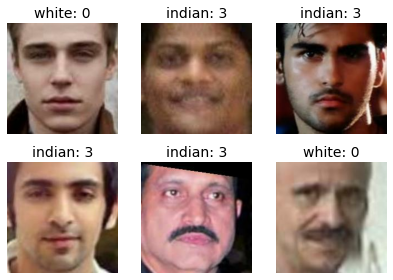

In [ ]:
plt.figure(tight_layout = True)
for X, Y in valid_set.take(1):
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.axis("off")
        plt.imshow(X[i].numpy(), cmap = "binary")
        plt.title(f"{race[int(Y[i].numpy())]}: {str(Y[i].numpy())}", fontsize = 14)

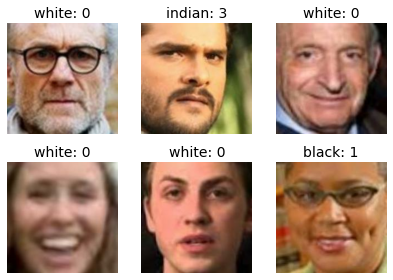

In [ ]:
plt.figure(tight_layout = True)
for X, Y in test_set.take(1):
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.axis("off")
        plt.imshow(X[i].numpy(), cmap = "binary")
        plt.title(f"{race[int(Y[i].numpy())]}: {str(Y[i].numpy())}", fontsize = 14)